The data comes from a payment service company, Vesta's real-world e-commerce transactions and contains a wide range of features from device type to product features. The company has over $18 billion in transactions annually.
Dataset source: https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 1. Import transaction and identity datasets

In [50]:
transaction = pd.read_csv('datasets/train_transaction.csv')
transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [52]:
transaction.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [53]:
transaction.TransactionID.nunique()

590540

<b>Transaction dataset description:</b>
- TransactionID: unique identifier. Some transactions may come from the same account, or both the same.
- TransactionDT: timedelta from a given reference datetime (not an actual timestamp). 
- TransactionAMT: transaction payment amount in USD
- ProductCD: product code, the product for each transaction
- card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
- addr1: billing region
- addr2: billing country
- dist: distance
- P_ and (R__) emaildomain: purchaser and recipient email domain
- C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
- D1-D15: timedelta, such as days between previous transaction, etc.
- M1-M9: match, such as names on card and address, etc.
- Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

<b>Categorical Features:</b>
- ProductCD
- card1 - card6
- addr1, addr2
- Pemaildomain Remaildomain
- M1 - M9

In [54]:
identity = pd.read_csv('datasets/train_identity.csv')
identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [55]:
identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

In [56]:
identity.isnull().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [57]:
identity.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [58]:
# We discovered that the TransactionID is also a unique identifier in identity dataset.
identity.TransactionID.nunique()

144233

# 2. Merge the 2 datasets

In [59]:
# Merge the 2 tables together
df = transaction.merge(identity, on='TransactionID', how='outer')
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [61]:
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [62]:
# to see the number of null values
df.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

# 3. Analysis of Transaction Dataset
## 3.1 Imbalance of Fraudulent Transactions

In [63]:
# to see the unique values in isFraud column
transaction.isFraud.unique()

array([0, 1])

In [64]:
# to see the number of columns that has null values
transaction.isnull().any().sum()

374

In [65]:
# to add count column
transaction['count'] = 1
transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,count
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


0    569877
1     20663
Name: isFraud, dtype: int64
0    0.96501
1    0.03499
Name: isFraud, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


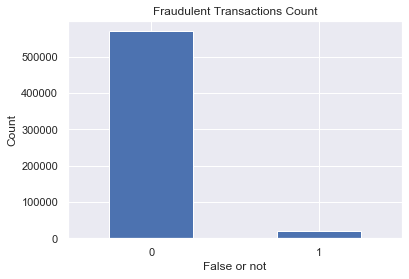

In [66]:
# to count the number of fraud and non-fraud transactions in "isFraud" column and plot it
print(df.isFraud.value_counts())
print(df.isFraud.value_counts()/np.sum(df.isFraud.value_counts()))
df.isFraud.value_counts().plot('bar')
plt.xticks(rotation=0)
plt.xlabel('False or not')
plt.ylabel('Count')
plt.title('Fraudulent Transactions Count')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/1. Fraudulent Transactions Count.jpeg',bbox_inches = "tight")
plt.show()

The # of transactions that is fraud (represented by 1) accounts for 3% of the total observations.

## 3.2	Transactions by Amount
There's no null values based on previous null value count.

In [67]:
transaction['TransactionAmt'].quantile([0,.01, .025, .1, .25, .5, .75, .9, .975, .99,1])

0.000        0.2510
0.010        9.2440
0.025       14.5010
0.100       25.9500
0.250       43.3210
0.500       68.7690
0.750      125.0000
0.900      275.2930
0.975      648.3345
0.990     1104.0000
1.000    31937.3910
Name: TransactionAmt, dtype: float64

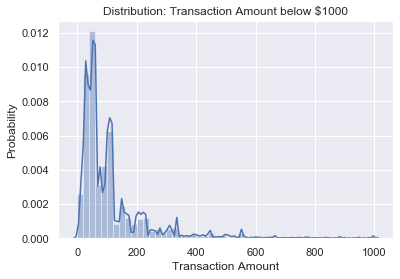

In [68]:
# to plot the distribution of amount below $1,000 as about 99% of the values are below this number
sns.distplot(transaction[transaction['TransactionAmt'] <= 1000]['TransactionAmt'])
plt.xlabel('Transaction Amount')
plt.ylabel('Probability')
plt.title('Distribution: Transaction Amount below $1000')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/2. Distribution: Transaction Amount below $1000.jpeg',bbox_inches = "tight")
plt.show()

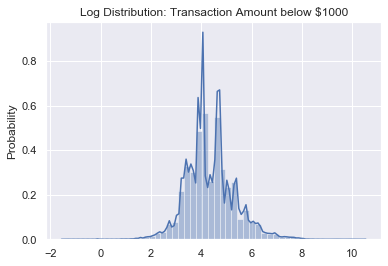

In [69]:
sns.distplot(np.log(transaction['TransactionAmt']))
plt.xlabel('')
plt.ylabel('Probability')
plt.title('Log Distribution: Transaction Amount below $1000')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/3. Log Distribution: Transaction Amount below $1000.jpeg',bbox_inches = "tight")
plt.show()

In [70]:
# to create a dataframe to include only fraudulent transactions
df_fraud = transaction[transaction['isFraud']==1]
df_fraud.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,count
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [71]:
df_fraud.shape

(20663, 395)

In [72]:
df_fraud['TransactionAmt'].quantile([0,.01, .025, .1, .25, .5, .75, .9, .975, .99,1])

0.000       0.29200
0.010       6.74096
0.025       9.50740
0.100      18.93600
0.250      35.04400
0.500      75.00000
0.750     161.00000
0.900     335.00000
0.975     884.00000
0.990     994.00000
1.000    5191.00000
Name: TransactionAmt, dtype: float64

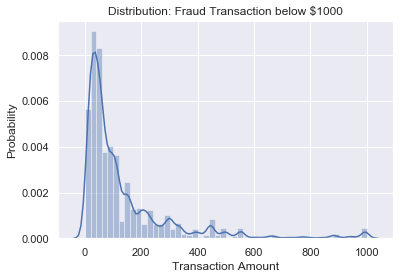

In [73]:
# to plot the distribution of fraudulent transaction below $1,000 based on previous quantile cal
sns.distplot(df_fraud[df_fraud['TransactionAmt'] <= 1000]['TransactionAmt'])
plt.xlabel('Transaction Amount')
plt.ylabel('Probability')
plt.title('Distribution: Fraud Transaction below $1000')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/4. Distribution: Fraud Transaction below $1000.jpeg',bbox_inches = "tight")
plt.show()

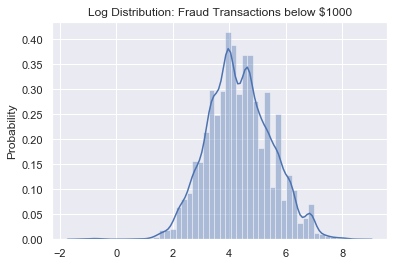

In [74]:
sns.distplot(np.log(df_fraud['TransactionAmt']))
plt.xlabel('')
plt.ylabel('Probability')
plt.title('Log Distribution: Fraud Transactions below $1000')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/5. Log Distribution: Fraud Transactions below $1000.jpeg',bbox_inches = "tight")
plt.show()

## 3.3	Transactions by Product Type

In [75]:
# to see the unique values of ProductCD column
transaction.ProductCD.unique()

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64
W    0.744522
C    0.116028
R    0.063838
H    0.055922
S    0.019690
Name: ProductCD, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


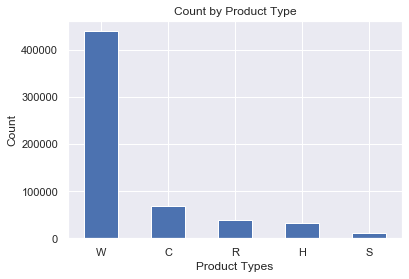

In [76]:
# to count the number of transactions by product type
print(transaction.ProductCD.value_counts())
print(transaction.ProductCD.value_counts()/np.sum(df.isFraud.value_counts()))
transaction.ProductCD.value_counts().plot('bar')
plt.xticks(rotation=0)
plt.xlabel('Product Types')
plt.ylabel('Count')
plt.title('Count by Product Type')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/6. Count by Product Type.jpeg',bbox_inches = "tight")
plt.show()

Most transactions are related to Product W, followed by C and R.

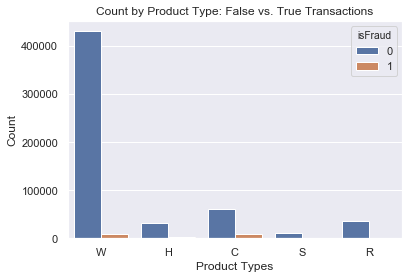

In [77]:
sns.countplot(x='ProductCD', hue='isFraud', data=transaction)
plt.xlabel('Product Types')
plt.ylabel('Count')
plt.title('Count by Product Type: False vs. True Transactions')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/7. Count by Product Type: False vs. True Transactions.jpeg',bbox_inches = "tight")
plt.show()

The count plot shows that the fraud transactions mostly occur to product type W & C. These are also the most common types of purchases.

W    8969
C    8008
H    1574
R    1426
S     686
Name: ProductCD, dtype: int64
W    0.434061
C    0.387553
H    0.076175
R    0.069012
S    0.033199
Name: ProductCD, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


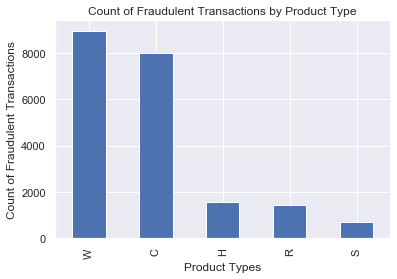

In [78]:
# Product type count on fraudulent transactions only
print(df_fraud.ProductCD.value_counts())
print(df_fraud.ProductCD.value_counts(normalize=True))
df_fraud.ProductCD.value_counts().plot('bar')
plt.xlabel('Product Types')
plt.ylabel('Count of Fraudulent Transactions')
plt.title('Count of Fraudulent Transactions by Product Type')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/8. Count of Fraudulent Transactions by Product Type.jpeg',bbox_inches = "tight")
plt.show()

C    0.116873
H    0.047662
R    0.037826
S    0.058996
W    0.020399
Name: ProductCD, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


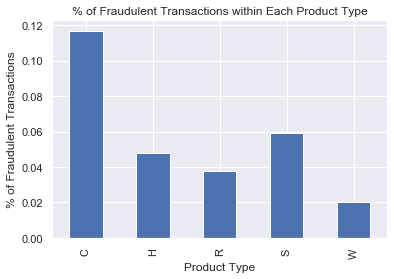

In [79]:
# Calculate the % of fraudulent transactions within each transaction type
product = df_fraud.ProductCD.value_counts()/transaction.ProductCD.value_counts()
print(product)
product.plot('bar')
plt.xlabel('Product Type')
plt.ylabel('% of Fraudulent Transactions')
plt.title('% of Fraudulent Transactions within Each Product Type')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/9. % of Fraudulent Transactions within Each Product Type.jpeg',bbox_inches = "tight")
plt.show()

The plot shows that among the fraudulent transactions, most common product types are "W", "C" and "H", followed closely by "R".

# 3.4 Transactions by Card Columns

card1       0
card2    8933
card3    1565
card4    1577
card5    4259
card6    1571
dtype: int64
card1    0.000000
card2    0.015127
card3    0.002650
card4    0.002670
card5    0.007212
card6    0.002660
dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """


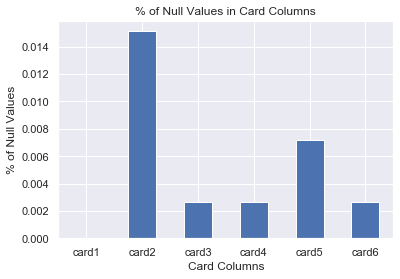

In [80]:
# to count the number of null values in card columns and plot the ratio
print(transaction.loc[:, transaction.columns[transaction.columns.str.startswith('card')]].isnull().sum())
cardnull = transaction.loc[:, transaction.columns[transaction.columns.str.startswith('card')]].isnull().sum()/transaction['count'].count()
print(cardnull)
cardnull.plot('bar')
plt.xticks(rotation=0)
plt.xlabel('Card Columns')
plt.ylabel('% of Null Values')
plt.title('% of Null Values in Card Columns')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/10. % of Null Values in Card Columns.jpeg',bbox_inches = "tight")
plt.show()

Based on the results above, the number of null values in card columns are insignificant.

In [81]:
# Calculate the number of card types in column card4 and their ratios
print(transaction.card4.value_counts())
print(transaction.card4.value_counts(normalize=True))

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64
visa                0.653296
mastercard          0.321271
american express    0.014140
discover            0.011293
Name: card4, dtype: float64


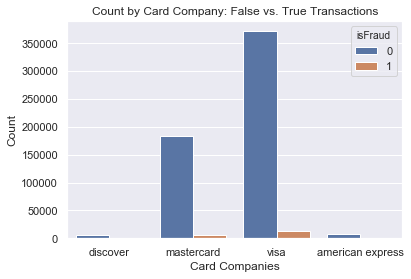

In [82]:
# to plot the count by card company and if the transaction is false
sns.countplot(x='card4', hue='isFraud', data=transaction)
plt.xlabel('Card Companies')
plt.ylabel('Count')
plt.title('Count by Card Company: False vs. True Transactions')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/11. Count by Card Company: False vs. True Transactions.jpeg',bbox_inches = "tight")
plt.show()

visa                13373
mastercard           6496
discover              514
american express      239
Name: card4, dtype: int64
visa                0.648482
mastercard          0.315003
discover            0.024925
american express    0.011590
Name: card4, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


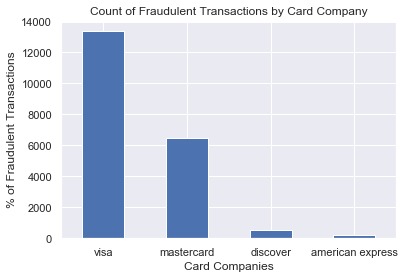

In [83]:
# count of card company of fraudulent transactions only
print(df_fraud.card4.value_counts())
print(df_fraud.card4.value_counts(normalize=True))
df_fraud.card4.value_counts().plot('bar')
plt.xticks(rotation=0)
plt.xlabel('Card Companies')
plt.ylabel('% of Fraudulent Transactions')
plt.title('Count of Fraudulent Transactions by Card Company')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/12. % of Fraudulent Transactions by Card Company.jpeg',bbox_inches = "tight")
plt.show()

american express    0.028698
discover            0.077282
mastercard          0.034331
visa                0.034756
Name: card4, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


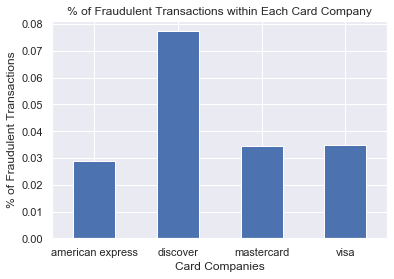

In [84]:
# Calculate the % of fraudulent transactions within each card company
card4 = df_fraud.card4.value_counts()/df.card4.value_counts()
print(card4)
card4.plot('bar')
plt.xticks(rotation=0)
plt.xlabel('Card Companies')
plt.ylabel('% of Fraudulent Transactions')
plt.title('% of Fraudulent Transactions within Each Card Company')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/13. % of Fraudulent Transactions within Each Card Company.jpeg',bbox_inches = "tight")
plt.show()

The count plot shows that most transactions are made through visa and mastercard. At the same time, there are also more fraudulant transactions related to these 2 types of cards. However, if we calculate the % of fraudulent transaction by card companies, Discover has the highest rate of false transactions of 7.7%. American Express has the lowest rate of 2.9%.

In [85]:
# to count the number of transactions by card type in column card6
print(df.card6.value_counts())
print(df.card6.value_counts(normalize=True))

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64
debit              0.746963
credit             0.252961
debit or credit    0.000051
charge card        0.000025
Name: card6, dtype: float64


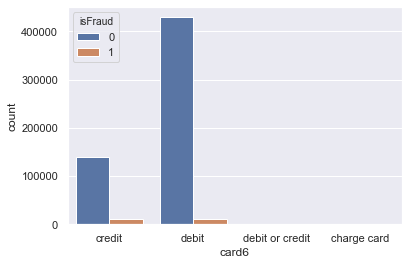

In [86]:
sns.countplot(x='card6', hue='isFraud', data=transaction)
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/14. Count by Card Type: False vs True Transactions.jpeg',bbox_inches = "tight")
plt.show()

The plot shows that more purchases are made by debit card than credit card, but the number of fraudulent transactions are proportionately more than non-fraudulent transactions.

debit     10674
credit     9950
Name: card6, dtype: int64
debit     0.517552
credit    0.482448
Name: card6, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


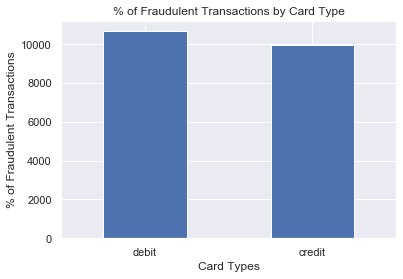

In [87]:
# count of fraudulent transactions by card type and plot the count by their ratio
print(df_fraud.card6.value_counts())
print(df_fraud.card6.value_counts(normalize=True))
df_fraud.card6.value_counts().plot('bar')
plt.xticks(rotation=0)
plt.xlabel('Card Types')
plt.ylabel('% of Fraudulent Transactions')
plt.title('% of Fraudulent Transactions by Card Type')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/15. % of Fraudulent Transactions by Card Type.jpeg',bbox_inches = "tight")
plt.show()

charge card             NaN
credit             0.066785
debit              0.024263
debit or credit         NaN
Name: card6, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


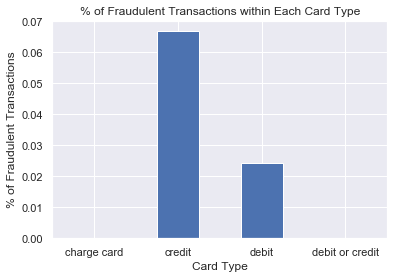

In [88]:
# Calculate the % of fraudulent transactions within each card type
card6 = df_fraud.card6.value_counts()/transaction.card6.value_counts()
print(card6)
card6.plot('bar')
plt.xticks(rotation=0)
plt.xlabel('Card Type')
plt.ylabel('% of Fraudulent Transactions')
plt.title('% of Fraudulent Transactions within Each Card Type')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/16. % of Fraudulent Transactions within Each Card Type.jpeg',bbox_inches = "tight")
plt.show()

## 3.5	Transactions by Email Address

In [97]:
# to count the # and pct of null values in the P_emaildomain column
print(transaction.P_emaildomain.isnull().sum())
print(transaction.P_emaildomain.isnull().sum()/transaction.shape[0])

94456
0.1599485216920107


In [99]:
# to count the # and pct of null values in the R_emaildomain column
print(transaction.R_emaildomain.isnull().sum())
print(transaction.R_emaildomain.isnull().sum()/transaction.shape[0])

453249
0.7675161716395164


In [100]:
# to replace the null values with 'none' in the P_emaildomain column
df['P_emaildomain'].fillna('none',inplace=True)

In [101]:
# to see the unique values in the P_emaildomain column
df.P_emaildomain.unique()

array(['none', 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [102]:
# We changed the value of whose count is below 1000 into the category of "other", and make some values consistent
P_dict = {'gmail.com':'gmail', 'outlook.com':'outlook', 'yahoo.com':'yahoo', 'mail.com':'other',
               'anonymous.com':'anonymous', 'hotmail.com':'hotmail', 'verizon.net':'verizon', 
               'aol.com':'aol', 'me.com':'me','comcast.net':'comcast', 'optonline.net':'optonline', 
               'cox.net':'cox', 'charter.net':'other','rocketmail.com':'other', 
               'prodigy.net.mx':'other', 'embarqmail.com':'other', 'icloud.com':'icloud',
               'live.com.mx':'live', 'live.com':'live', 'att.net':'att', 'juno.com':'other',
               'ymail.com':'ymail', 'sbcglobal.net':'sbcglobal', 'bellsouth.net':'bellsouth', 
               'msn.com':'msn', 'q.com':'other','yahoo.com.mx':'yahoo', 'centurylink.net':'other', 
               'servicios-ta.com':'other','earthlink.net':'other', 'hotmail.es':'hotmail', 
               'cfl.rr.com':'other', 'roadrunner.com':'other','netzero.net':'other', 
               'gmx.de':'other', 'suddenlink.net':'other', 'frontiernet.net':'other',
               'windstream.net':'other', 'frontier.com':'other', 'outlook.es':'outlook', 
               'mac.com':'other','netzero.com':'other', 'aim.com':'other', 'web.de':'other', 
               'twc.com':'other', 'cableone.net':'other','yahoo.fr':'yahoo', 'yahoo.de':'yahoo', 
               'yahoo.es':'yahoo', 'sc.rr.com':'other', 'ptd.net':'other','live.fr':'live', 
               'yahoo.co.uk':'yahoo', 'hotmail.fr':'hotmail', 'hotmail.de':'hotmail',
               'hotmail.co.uk':'hotmail', 'protonmail.com':'other', 'yahoo.co.jp':'yahoo'}
transaction_P = transaction.replace({'P_emaildomain': P_dict})

In [103]:
print(transaction_P.P_emaildomain.value_counts())
print(transaction_P.P_emaildomain.value_counts(normalize=True))

gmail        228851
yahoo        102909
hotmail       46005
anonymous     36998
aol           28289
comcast        7888
other          7466
icloud         6267
outlook        5534
msn            4092
att            4033
live           3846
sbcglobal      2970
verizon        2705
ymail          2396
bellsouth      1909
me             1522
cox            1393
optonline      1011
Name: P_emaildomain, dtype: int64
gmail        0.461315
yahoo        0.207443
hotmail      0.092736
anonymous    0.074580
aol          0.057025
comcast      0.015901
other        0.015050
icloud       0.012633
outlook      0.011155
msn          0.008249
att          0.008130
live         0.007753
sbcglobal    0.005987
verizon      0.005453
ymail        0.004830
bellsouth    0.003848
me           0.003068
cox          0.002808
optonline    0.002038
Name: P_emaildomain, dtype: float64


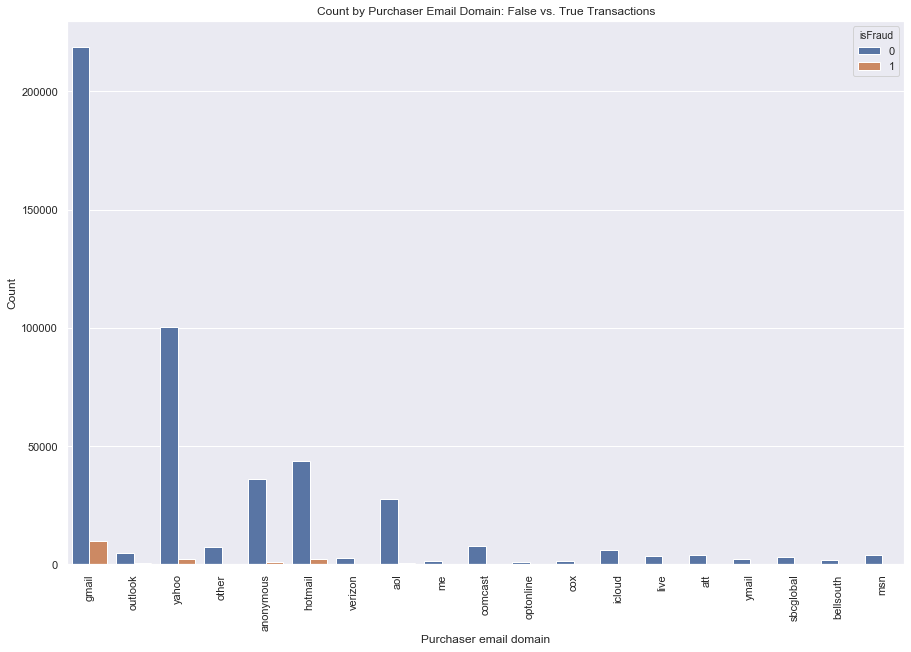

In [104]:
plt.figure(figsize=(15, 10))
sns.countplot(x='P_emaildomain', hue='isFraud', data=transaction_P)
plt.xlabel('Purchaser email domain')
plt.ylabel('Count')
plt.title('Count by Purchaser Email Domain: False vs. True Transactions')
plt.xticks(rotation=90)
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/17. Count by Purchaser Email Domain: False vs. True Transactions.jpeg',bbox_inches = "tight")
plt.show()

In [105]:
# to create a dataframe with only fraudulent transactions
P_fraud = transaction_P[transaction_P['isFraud']==1]
P_fraud.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,count
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
245,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
288,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


gmail        9954
hotmail      2416
yahoo        2320
anonymous     859
aol           617
outlook       539
other         270
comcast       246
icloud        197
live          125
msn            90
bellsouth      53
ymail          50
att            30
cox            29
me             27
verizon        22
optonline      17
sbcglobal      12
Name: P_emaildomain, dtype: int64
gmail        0.556929
hotmail      0.135176
yahoo        0.129805
anonymous    0.048061
aol          0.034521
outlook      0.030157
other        0.015107
comcast      0.013764
icloud       0.011022
live         0.006994
msn          0.005036
bellsouth    0.002965
ymail        0.002798
att          0.001679
cox          0.001623
me           0.001511
verizon      0.001231
optonline    0.000951
sbcglobal    0.000671
Name: P_emaildomain, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


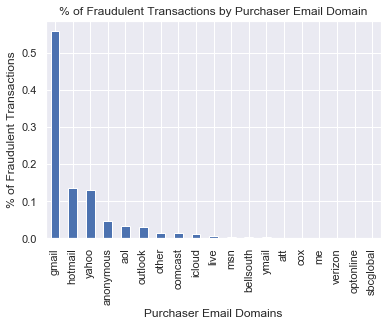

In [106]:
print(P_fraud.P_emaildomain.value_counts())
print(P_fraud.P_emaildomain.value_counts(normalize=True))
P_fraud.P_emaildomain.value_counts(normalize=True).plot('bar')
plt.xticks(rotation=90)
plt.xlabel('Purchaser Email Domains')
plt.ylabel('% of Fraudulent Transactions')
plt.title('% of Fraudulent Transactions by Purchaser Email Domain')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/18. % of Fraudulent Transactions by Purchaser Email Domain.jpeg',bbox_inches = "tight")
plt.show()

anonymous    0.023217
aol          0.021811
att          0.007439
bellsouth    0.027763
comcast      0.031187
cox          0.020818
gmail        0.043496
hotmail      0.052516
icloud       0.031434
live         0.032501
me           0.017740
msn          0.021994
optonline    0.016815
other        0.036164
outlook      0.097398
sbcglobal    0.004040
verizon      0.008133
yahoo        0.022544
ymail        0.020868
Name: P_emaildomain, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


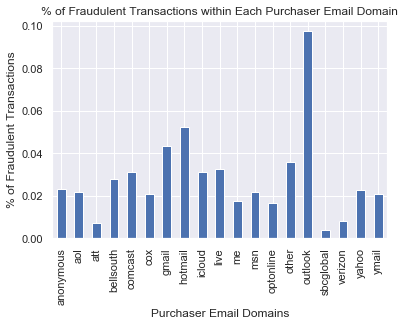

In [107]:
# Calculate the % of fraudulent transactions within each purchaser email domain
pemail = P_fraud.P_emaildomain.value_counts()/transaction_P.P_emaildomain.value_counts()
print(pemail)
pemail.plot('bar')
plt.xticks(rotation=90)
plt.xlabel('Purchaser Email Domains')
plt.ylabel('% of Fraudulent Transactions')
plt.title('% of Fraudulent Transactions within Each Purchaser Email Domain')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/19. % of Fraudulent Transactions within Each Purchaser Email Domain.jpeg',bbox_inches = "tight")
plt.show()

The bar chart above shows that the top 5 mail domains are also the ones with most fraud transactions, such as gmail, hotmail and those with null values.

In [108]:
# to count by recipient email domain
transaction.R_emaildomain.value_counts()

gmail.com           57147
hotmail.com         27509
anonymous.com       20529
yahoo.com           11842
aol.com              3701
outlook.com          2507
comcast.net          1812
yahoo.com.mx         1508
icloud.com           1398
msn.com               852
live.com              762
live.com.mx           754
verizon.net           620
me.com                556
sbcglobal.net         552
cox.net               459
outlook.es            433
att.net               430
bellsouth.net         422
hotmail.fr            293
hotmail.es            292
web.de                237
mac.com               218
ymail.com             207
prodigy.net.mx        207
optonline.net         187
gmx.de                147
yahoo.fr              137
charter.net           127
mail.com              122
hotmail.co.uk         105
gmail                  95
earthlink.net          79
yahoo.de               75
rocketmail.com         69
embarqmail.com         68
scranton.edu           63
yahoo.es               57
live.fr     

In [109]:
# to replace the null values with 'none'
transaction['R_emaildomain'].fillna('none',inplace=True)

In [110]:
# to see the unique values in the R_emaildomain column
transaction.R_emaildomain.unique()

array(['none', 'gmail.com', 'hotmail.com', 'outlook.com', 'anonymous.com',
       'charter.net', 'prodigy.net.mx', 'comcast.net', 'live.com.mx',
       'icloud.com', 'yahoo.com', 'aol.com', 'juno.com', 'att.net',
       'verizon.net', 'yahoo.com.mx', 'bellsouth.net', 'servicios-ta.com',
       'ymail.com', 'hotmail.es', 'msn.com', 'optonline.net', 'live.com',
       'gmx.de', 'aim.com', 'mail.com', 'me.com', 'outlook.es', 'cox.net',
       'earthlink.net', 'embarqmail.com', 'web.de', 'sbcglobal.net',
       'scranton.edu', 'mac.com', 'twc.com', 'roadrunner.com', 'yahoo.fr',
       'yahoo.de', 'yahoo.es', 'frontiernet.net', 'gmail', 'live.fr',
       'q.com', 'yahoo.co.uk', 'windstream.net', 'suddenlink.net',
       'hotmail.fr', 'ptd.net', 'hotmail.de', 'frontier.com',
       'cfl.rr.com', 'hotmail.co.uk', 'netzero.com', 'netzero.net',
       'yahoo.co.jp', 'rocketmail.com', 'centurylink.net',
       'protonmail.com', 'cableone.net', 'sc.rr.com'], dtype=object)

In [111]:
# We changed the value of whose count is below 400 into the category of "other", and make some values consistent
R_dict = {'gmail.com':'gmail', 'hotmail.com':'hotmail', 'outlook.com':'outlook', 
               'anonymous.com':'anonymous','charter.net':'other', 'prodigy.net.mx':'other', 
               'comcast.net':'comcast', 'live.com.mx':'live','icloud.com':'icloud', 
               'yahoo.com':'yahoo', 'aol.com':'aol', 'juno.com':'other', 'att.net':'att',
               'verizon.net':'verizon', 'yahoo.com.mx':'yahoo', 'bellsouth.net':'bellsouth', 
               'servicios-ta.com':'other','ymail.com':'other', 'hotmail.es':'hotmail', 
               'msn.com':'msn', 'optonline.net':'other', 'live.com':'live',
               'gmx.de':'other', 'aim.com':'other', 'mail.com':'other', 'me.com':'me', 
               'outlook.es':'oulook', 'cox.net':'other','earthlink.net':'other', 
               'embarqmail.com':'other', 'web.de':'other', 'sbcglobal.net':'other',
               'scranton.edu':'other', 'mac.com':'other', 'twc.com':'other', 
               'roadrunner.com':'other', 'yahoo.fr':'yahoo','yahoo.de':'yahoo', 
               'yahoo.es':'yahoo', 'frontiernet.net':'other', 'live.fr':'live',
               'q.com':'other', 'yahoo.co.uk':'yahoo', 'windstream.net':'other',
               'suddenlink.net':'other','hotmail.fr':'hotmail', 'ptd.net':'other', 
               'hotmail.de':'hotmail', 'frontier.com':'other','cfl.rr.com':'other', 
               'hotmail.co.uk':'hotmail', 'netzero.com':'other', 'netzero.net':'other',
               'yahoo.co.jp':'yahoo', 'rocketmail.com':'other', 'centurylink.net':'other',
               'protonmail.com':'other', 'cableone.net':'other', 'sc.rr.com':'other'}
transaction_R = transaction.replace({'R_emaildomain':R_dict})

In [112]:
transaction_R.R_emaildomain.value_counts()

none         453249
gmail         57242
hotmail       28241
anonymous     20529
yahoo         13691
aol            3701
other          3286
outlook        2507
comcast        1812
live           1571
icloud         1398
msn             852
verizon         620
me              556
oulook          433
att             430
bellsouth       422
Name: R_emaildomain, dtype: int64

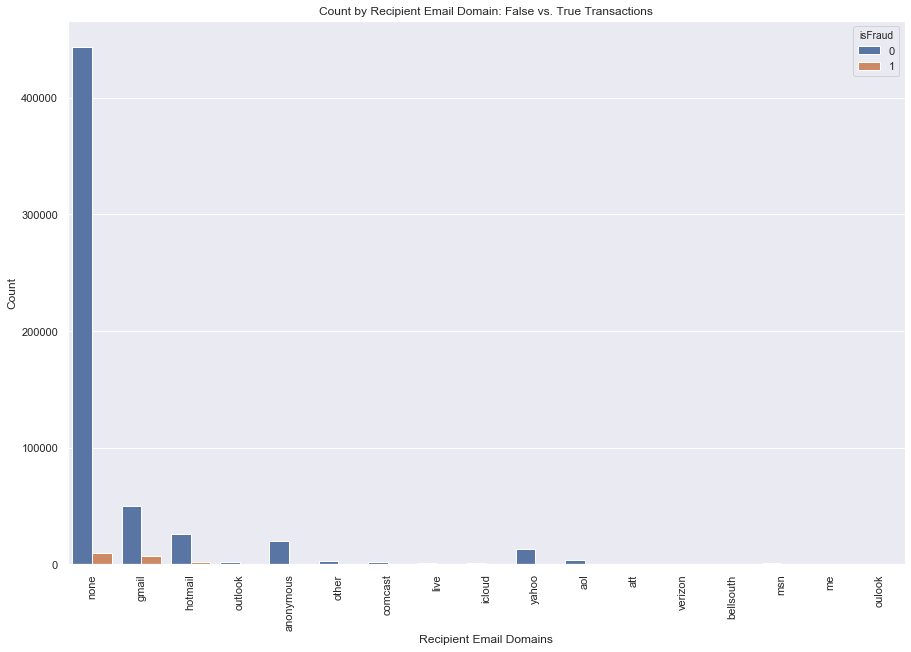

In [113]:
plt.figure(figsize=(15, 10))
sns.countplot(x='R_emaildomain', hue='isFraud', data=transaction_R)
plt.xlabel('Recipient Email Domains')
plt.ylabel('Count')
plt.title('Count by Recipient Email Domain: False vs. True Transactions')
plt.xticks(rotation=90)
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/20. Count by Recipient Email Domain: False vs. True Transactions.jpeg',bbox_inches = "tight")
plt.show()

The histogram shows that the top 3 recipient email domains have most fraud transactions, namely gmail, hotmail and those whose data is missing. However, as over 76% of data is missing, the result is not representative and should be used only for reference purpose.

## 3.6	M1-M9 Columns

M1    271100
M2    271100
M3    271100
M4    281444
M5    350482
M6    169360
M7    346265
M8    346252
M9    346252
dtype: int64
M1    0.459071
M2    0.459071
M3    0.459071
M4    0.476588
M5    0.593494
M6    0.286788
M7    0.586353
M8    0.586331
M9    0.586331
dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """


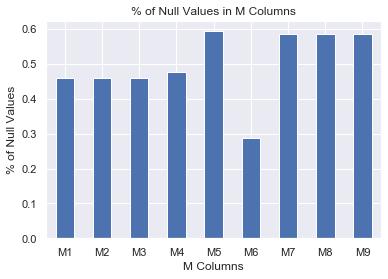

In [114]:
# count and plot the number of null values in M columns 
print(transaction.loc[:, transaction.columns[transaction.columns.str.startswith('M')]].isnull().sum())
M_count = transaction.loc[:, transaction.columns[transaction.columns.str.startswith('M')]].isnull().sum()/transaction['count'].count()
print(M_count)
M_count.plot('bar')
plt.xticks(rotation=0)
plt.xlabel('M Columns')
plt.ylabel('% of Null Values')
plt.title('% of Null Values in M Columns')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/21. % of Null Values in M Columns.jpeg',bbox_inches = "tight")
plt.show()

---- M1 ---
T    319415
F        25
Name: M1, dtype: int64
---- M2 ---
T    285468
F     33972
Name: M2, dtype: int64
---- M3 ---
T    251731
F     67709
Name: M3, dtype: int64
---- M5 ---
F    132491
T    107567
Name: M5, dtype: int64
---- M6 ---
F    227856
T    193324
Name: M6, dtype: int64
---- M7 ---
F    211374
T     32901
Name: M7, dtype: int64
---- M8 ---
F    155251
T     89037
Name: M8, dtype: int64
---- M9 ---
T    205656
F     38632
Name: M9, dtype: int64


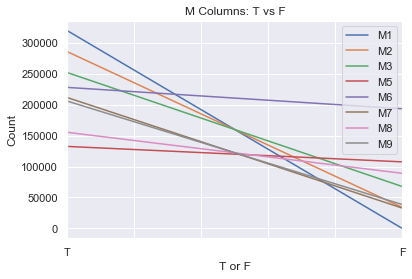

In [115]:
# to create a new dataframe df_M to include the M columns
df_M = transaction[['M1', 'M2', 'M3','M5', 'M6', 'M7', 'M8', 'M9']]

# to count the number of values of T & F in M columns
for c in df_M.columns:
    print("---- %s ---" % c)
    print(df_M[c].value_counts())
    df_M[c].value_counts().plot()
    plt.legend()
plt.xlabel('T or F')
plt.ylabel('Count')
plt.title('M Columns: T vs F')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/22. M Columns: T vs F.jpeg',bbox_inches = "tight")
plt.show()

In [116]:
# to create a dataframe and filter it to include only fraudulent transactions
fraud_M = transaction[['M1', 'M2', 'M3','M5', 'M6', 'M7', 'M8', 'M9', 'isFraud']]
df_fraud_M = fraud_M[fraud_M['isFraud']==1]
df_fraud_M.head(3)

,M1,M2,M3,M5,M6,M7,M8,M9,isFraud
203,NaN,NaN,NaN,F,T,NaN,NaN,NaN,1
240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


---- M1 ---
T    6342
Name: M1, dtype: int64
---- M2 ---
T    5158
F    1184
Name: M2, dtype: int64
---- M3 ---
T    4293
F    2049
Name: M3, dtype: int64
---- M5 ---
T    4055
F    3514
Name: M5, dtype: int64
---- M6 ---
F    5397
T    3295
Name: M6, dtype: int64
---- M7 ---
F    4089
T     728
Name: M7, dtype: int64
---- M8 ---
F    3373
T    1444
Name: M8, dtype: int64
---- M9 ---
T    3658
F    1159
Name: M9, dtype: int64
---- isFraud ---
1    20663
Name: isFraud, dtype: int64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


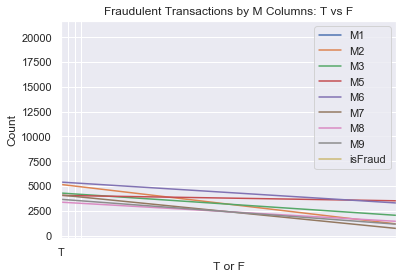

In [117]:
# to count the number of T & F of fraudulent transactions in M columns
for c in df_fraud_M.columns:
    print("---- %s ---" % c)
    print(df_fraud_M[c].value_counts())
    df_fraud_M[c].value_counts().plot()
    plt.legend()
plt.xlabel('T or F')
plt.ylabel('Count')
plt.title('Fraudulent Transactions by M Columns: T vs F')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/23. Fraudulent Transactions by M Columns: T vs F.jpeg',bbox_inches = "tight")
plt.show()

In [118]:
# to see the unique values in the column
transaction['M4'].unique()

array(['M2', 'M0', nan, 'M1'], dtype=object)

In [119]:
# to replace the nan values with "other"
transaction['M4'].fillna('other', inplace=True)

other    281444
M0       196405
M2        59865
M1        52826
Name: M4, dtype: int64
other    0.476588
M0       0.332585
M2       0.101373
M1       0.089454
Name: M4, dtype: float64


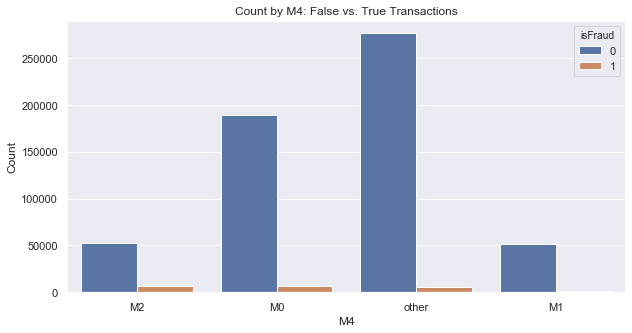

In [120]:
# to count M4 by its unique values and plot it
print(transaction.M4.value_counts())
print(transaction.M4.value_counts(normalize=True))

plt.figure(figsize=(10, 5))
sns.countplot(x='M4', hue='isFraud', data=transaction)
plt.xlabel('M4')
plt.ylabel('Count')
plt.title('Count by M4: False vs. True Transactions')
plt.xticks(rotation=0)
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/24. Count by M4: False vs. True Transactions.jpeg',bbox_inches = "tight")
plt.show()

In [121]:
# to count the # of unique values by M4 and if the transaction is fraudulent
transaction.groupby(['M4','isFraud']).size()

M4     isFraud
M0     0          189207
       1            7198
M1     0           51397
       1            1429
M2     0           53056
       1            6809
other  0          276217
       1            5227
dtype: int64

M0       0.036649
M1       0.027051
M2       0.113739
other    0.018572
Name: M4, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


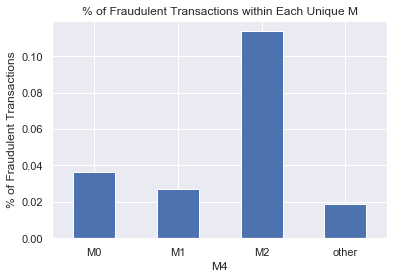

In [122]:
# to filter the dataset by fraudulent transactions only and count the pct of frauds within each M type
fraud_M4 = transaction[transaction['isFraud']==1]
M4 = fraud_M4.M4.value_counts()/transaction.M4.value_counts()
print(M4)

M4.plot('bar')
plt.xticks(rotation=0)
plt.xlabel('M4')
plt.ylabel('% of Fraudulent Transactions')
plt.title('% of Fraudulent Transactions within Each Unique M')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/25. % of Fraudulent Transactions within Each Unique M.jpeg',bbox_inches = "tight")
plt.show()

# 4. Identity Dataset Analysis

In [123]:
# to calculate the pct of null values in each column in the identity dataset
identity_null = identity.isnull().sum()/144233
identity_null

TransactionID    0.000000
id_01            0.000000
id_02            0.023303
id_03            0.540161
id_04            0.540161
id_05            0.051084
id_06            0.051084
id_07            0.964259
id_08            0.964259
id_09            0.480521
id_10            0.480521
id_11            0.022568
id_12            0.000000
id_13            0.117262
id_14            0.445037
id_15            0.022519
id_16            0.103257
id_17            0.033723
id_18            0.687221
id_19            0.034077
id_20            0.034472
id_21            0.964231
id_22            0.964162
id_23            0.964162
id_24            0.967088
id_25            0.964419
id_26            0.964204
id_27            0.964162
id_28            0.022568
id_29            0.022568
id_30            0.462224
id_31            0.027393
id_32            0.462079
id_33            0.491871
id_34            0.460560
id_35            0.022519
id_36            0.022519
id_37            0.022519
id_38       

/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


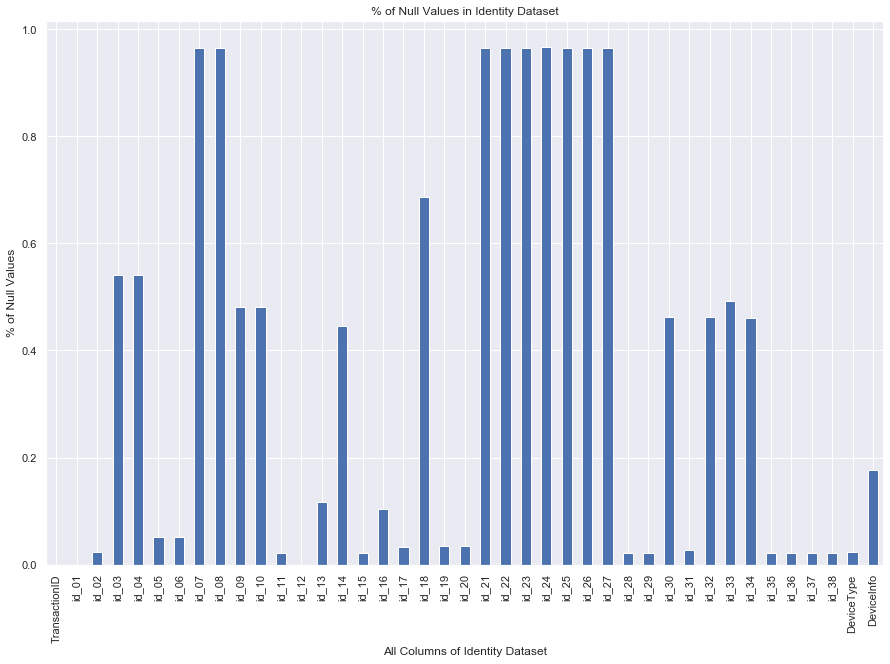

In [124]:
# to plot the pct of null values in each column in the identity dataset
plt.figure(figsize=(15, 10))
identity_null.plot('bar')
plt.xticks(rotation=90)
plt.xlabel('All Columns of Identity Dataset')
plt.ylabel('% of Null Values')
plt.title('% of Null Values in Identity Dataset')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/26. % of Null Values in Identity Dataset.jpeg',bbox_inches = "tight")
plt.show()

In [125]:
# to calculate the quantile values of 'id_01'
identity['id_01'].quantile([0,.01, .025, .1, .25, .5, .75, .9, .975, .99,1])

0.000   -100.0
0.010    -95.0
0.025    -50.0
0.100    -20.0
0.250    -10.0
0.500     -5.0
0.750     -5.0
0.900      0.0
0.975      0.0
0.990      0.0
1.000      0.0
Name: id_01, dtype: float64

In [126]:
# value count of the 'id_01'
identity['id_01'].value_counts()

-5.0     82170
 0.0     19555
-10.0    11257
-20.0    11211
-15.0     5674
         ...  
-47.0        1
-54.0        1
-86.0        1
-28.0        1
-57.0        1
Name: id_01, Length: 77, dtype: int64

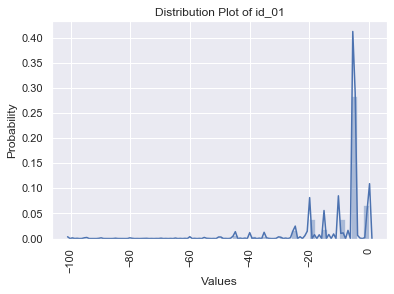

In [127]:
# to plot the distribution of 'id_01' as all values are equal to or below 0 and above -100 with an interval of -5
sns.distplot(identity[identity['id_01'] <= 0]['id_01'])
plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Distribution Plot of id_01')
plt.xticks(rotation=90)
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/27. Distribution Plot of Column id_01.jpeg',bbox_inches = "tight")
plt.show()

---- id_12 ---
NotFound    123025
Found        21208
Name: id_12, dtype: int64
---- id_16 ---
Found       66324
NotFound    63016
Name: id_16, dtype: int64
---- id_29 ---
Found       74926
NotFound    66052
Name: id_29, dtype: int64


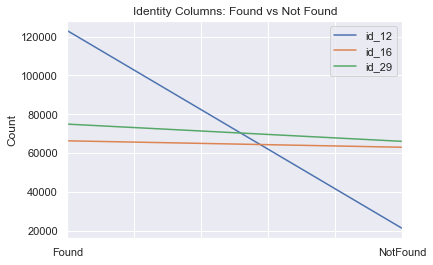

In [128]:
# to count and plot the number of "Found" and "NotFound" in 3 columns
identity_12 = identity[['id_12', 'id_16', 'id_29']]
for c in identity_12.columns:
    print("---- %s ---" % c)
    print(identity_12[c].value_counts())
    identity_12[c].value_counts().plot()
    plt.legend()
plt.ylabel('Count')
plt.title('Identity Columns: Found vs Not Found')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/28. Identity Columns: Found vs Not Found.jpeg',bbox_inches = "tight")
plt.show()

---- id_15 ---
Found      67728
New        61612
Unknown    11645
Name: id_15, dtype: int64
---- id_28 ---
Found    76232
New      64746
Name: id_28, dtype: int64


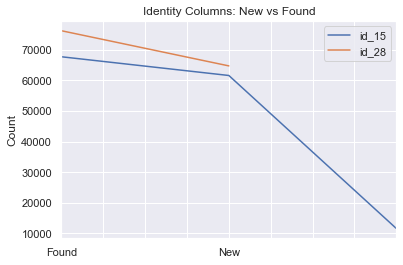

In [129]:
# to count and plot "Found", "New", "Unknown" in 2 columns
identity_15 = identity[['id_15', 'id_28']]
for c in identity_15.columns:
    print("---- %s ---" % c)
    print(identity_15[c].value_counts())
    identity_15[c].value_counts().plot()
    plt.legend()
plt.ylabel('Count')
plt.title('Identity Columns: New vs Found')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/29. Identity Columns: New vs Found.jpeg',bbox_inches = "tight")
plt.show()

In [130]:
# to see the unique values of id_30
identity['id_30'].unique()

array(['Android 7.0', 'iOS 11.1.2', nan, 'Mac OS X 10_11_6', 'Windows 10',
       'Android', 'Linux', 'iOS 11.0.3', 'Mac OS X 10_7_5',
       'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'iOS 11.1.0',
       'Mac OS X 10_9_5', 'Windows 7', 'Windows 8.1', 'Mac', 'iOS 10.3.3',
       'Mac OS X 10.12', 'Mac OS X 10_10_5', 'Mac OS X 10_11_5',
       'iOS 9.3.5', 'Android 5.1.1', 'Android 7.1.1', 'Android 6.0',
       'iOS 10.3.1', 'Mac OS X 10.9', 'iOS 11.1.1', 'Windows Vista',
       'iOS 10.3.2', 'iOS 11.0.2', 'Mac OS X 10.11', 'Android 8.0.0',
       'iOS 10.2.0', 'iOS 10.2.1', 'iOS 11.0.0', 'Mac OS X 10.10',
       'Mac OS X 10_12_3', 'Mac OS X 10_12', 'Android 6.0.1', 'iOS',
       'Mac OS X 10.13', 'Mac OS X 10_12_5', 'Mac OS X 10_8_5',
       'iOS 11.0.1', 'iOS 10.0.2', 'Android 5.0.2', 'Windows XP',
       'iOS 11.2.0', 'Mac OS X 10.6', 'Windows 8', 'Mac OS X 10_6_8',
       'Mac OS X 10_11_4', 'Mac OS X 10_12_1', 'iOS 10.1.1',
       'Mac OS X 10_11_3', 'Mac OS X 10_12_4', 'Mac OS X 10

In [150]:
identity['id_30'].nunique()

75

Windows 10          21155
Windows 7           13110
iOS 11.2.1           3722
iOS 11.1.2           3699
Android 7.0          2871
Mac OS X 10_12_6     2559
Name: id_30, dtype: int64
NaN            0.868654
Windows 10     0.035823
Windows 7      0.022200
iOS 11.2.1     0.006303
iOS 11.1.2     0.006264
Android 7.0    0.004862
Name: id_30, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """


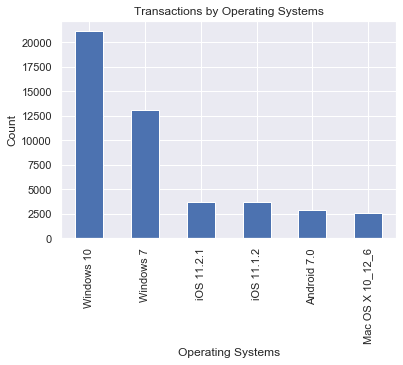

In [131]:
# to count and plot the number of operating systems
print(df['id_30'].value_counts().head(6))
print(df['id_30'].value_counts(normalize=True, dropna=False).head(6))

df['id_30'].value_counts(dropna=True).head(6).plot('bar')
plt.xlabel('Operating Systems')
plt.ylabel('Count')
plt.title('Transactions by Operating Systems')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/30. Transactions by Operating Systems.jpeg',bbox_inches = "tight")
plt.show()

/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """


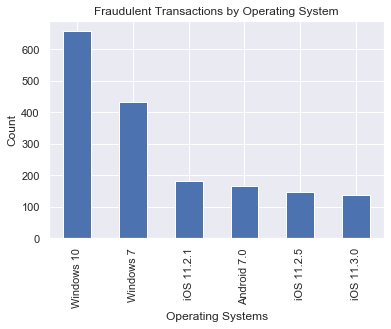

In [132]:
# use the merged dataset to filter the dataset by fraud transactions as it includes identity info
fraud_id = df[df['isFraud']==1]

# plot the value_counts of fraudulent transactions by operating system
fraud_id['id_30'].value_counts().head(6).plot('bar')
plt.xlabel('Operating Systems')
plt.ylabel('Count')
plt.title('Fraudulent Transactions by Operating System')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/31. Fraudulent Transactions by Operating System.jpeg',bbox_inches = "tight")
plt.show()

In [133]:
identity['id_31'].unique()

array(['samsung browser 6.2', 'mobile safari 11.0', 'chrome 62.0', nan,
       'chrome 62.0 for android', 'edge 15.0', 'mobile safari generic',
       'chrome 49.0', 'chrome 61.0', 'edge 16.0', 'safari generic',
       'edge 14.0', 'chrome 56.0 for android', 'firefox 57.0',
       'chrome 54.0 for android', 'mobile safari uiwebview', 'chrome',
       'chrome 62.0 for ios', 'firefox', 'chrome 60.0 for android',
       'mobile safari 10.0', 'chrome 61.0 for android',
       'ie 11.0 for desktop', 'ie 11.0 for tablet', 'mobile safari 9.0',
       'chrome generic', 'other', 'chrome 59.0 for android',
       'firefox 56.0', 'android webview 4.0', 'chrome 55.0', 'opera 49.0',
       'ie', 'chrome 55.0 for android', 'firefox 52.0',
       'chrome 57.0 for android', 'chrome 56.0',
       'chrome 46.0 for android', 'chrome 58.0', 'firefox 48.0',
       'chrome 59.0', 'samsung browser 4.0', 'edge 13.0',
       'chrome 53.0 for android', 'chrome 58.0 for android',
       'chrome 60.0', 'mobile sa

In [151]:
identity['id_31'].nunique()

130

chrome 63.0              22000
mobile safari 11.0       13423
mobile safari generic    11474
ie 11.0 for desktop       9030
safari generic            8195
chrome 62.0               7182
Name: id_31, dtype: int64
NaN                      0.762451
chrome 63.0              0.037254
mobile safari 11.0       0.022730
mobile safari generic    0.019430
ie 11.0 for desktop      0.015291
safari generic           0.013877
Name: id_31, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


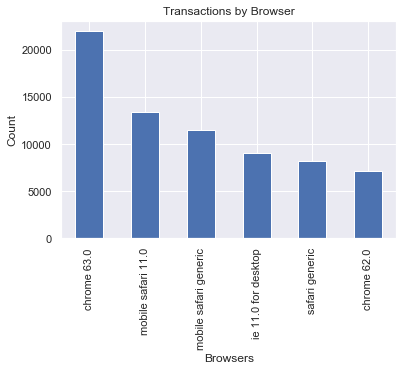

In [134]:
print(df['id_31'].value_counts().head(6))
print(df['id_31'].value_counts(normalize=True, dropna=False).head(6))

df['id_31'].value_counts(dropna=True).head(6).plot('bar')
plt.xlabel('Browsers')
plt.ylabel('Count')
plt.title('Transactions by Browser')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/32. Transactions by Browser.jpeg',bbox_inches = "tight")
plt.show()

/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


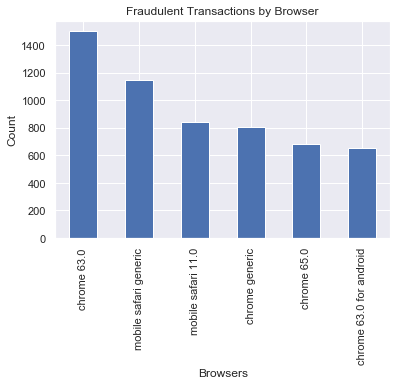

In [135]:
# plot the value_counts of fraudulent transactions by operating system
fraud_id['id_31'].value_counts().head(6).plot('bar')
plt.xlabel('Browsers')
plt.ylabel('Count')
plt.title('Fraudulent Transactions by Browser')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/33. Fraudulent Transactions by Browser.jpeg',bbox_inches = "tight")
plt.show()

In [136]:
# to see the unique values of column 'id_34'
identity['id_34'].unique()

array(['match_status:2', 'match_status:1', nan, 'match_status:0',
       'match_status:-1'], dtype=object)

match_status:2     60011
match_status:1     17376
match_status:0       415
match_status:-1        3
Name: id_34, dtype: int64
match_status:2     0.771300
match_status:1     0.223328
match_status:0     0.005334
match_status:-1    0.000039
Name: id_34, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """


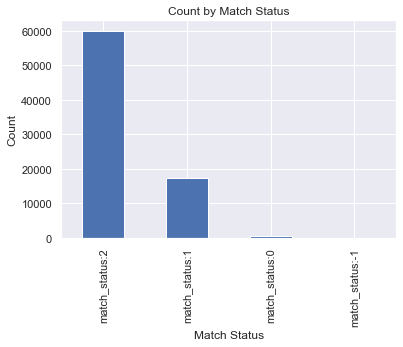

In [137]:
# count the number of unique values in column 'id_34' and plot it
print(identity['id_34'].value_counts())
print(identity['id_34'].value_counts(normalize=True))

identity['id_34'].value_counts().plot('bar')
plt.xlabel('Match Status')
plt.ylabel('Count')
plt.title('Count by Match Status')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/34. Count by Match Status.jpeg',bbox_inches = "tight")
plt.show()

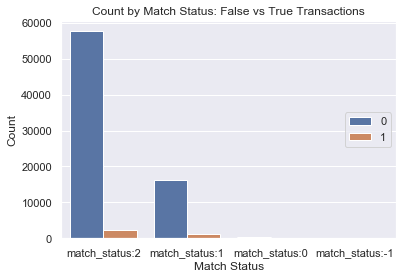

In [138]:
# to count by match status and if the transaction is false
sns.countplot(x='id_34', hue='isFraud', data=df)
plt.xlabel('Match Status')
plt.ylabel('Count')
plt.legend(loc='center right')
plt.title('Count by Match Status: False vs True Transactions')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/35. Count by Match Status: False vs True Transactions.jpeg',bbox_inches = "tight")
plt.show()

match_status:2    2358
match_status:1    1106
match_status:0      21
Name: id_34, dtype: int64
match_status:2    0.676614
match_status:1    0.317360
match_status:0    0.006026
Name: id_34, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


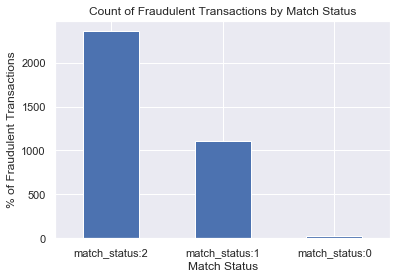

In [139]:
# Match status count on fraudulent transactions only
print(fraud_id.id_34.value_counts())
print(fraud_id.id_34.value_counts(normalize=True))
fraud_id.id_34.value_counts().plot('bar')
plt.xticks(rotation=0)
plt.xlabel('Match Status')
plt.ylabel('% of Fraudulent Transactions')
plt.title('Count of Fraudulent Transactions by Match Status')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/36. % of Fraudulent Transactions by Match Status.jpeg',bbox_inches = "tight")
plt.show()

match_status:-1         NaN
match_status:0     0.050602
match_status:1     0.063651
match_status:2     0.039293
Name: id_34, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


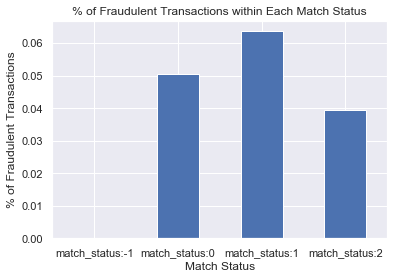

In [140]:
# Calculate the % of fraudulent transactions within each match status
id_34 = fraud_id.id_34.value_counts()/df.id_34.value_counts()
print(id_34)
id_34.plot('bar')
plt.xticks(rotation=0)
plt.xlabel('Match Status')
plt.ylabel('% of Fraudulent Transactions')
plt.title('% of Fraudulent Transactions within Each Match Status')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/37. % of Fraudulent Transactions within Each Match Status.jpeg',bbox_inches = "tight")
plt.show()

---- id_35 ---
T    77814
F    63171
Name: id_35, dtype: int64
---- id_36 ---
F    134066
T      6919
Name: id_36, dtype: int64
---- id_37 ---
T    110452
F     30533
Name: id_37, dtype: int64
---- id_38 ---
F    73922
T    67063
Name: id_38, dtype: int64


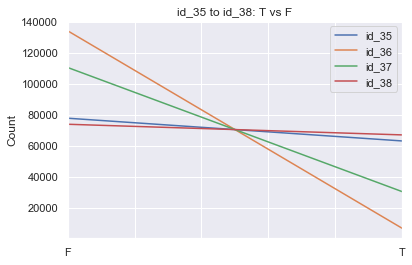

In [141]:
# to create a new dataframe for the 4 columns below
identity_35 = identity[['id_35', 'id_36', 'id_37', 'id_38']]

# to count and plot the number of T & F values in the 4 columns
for c in identity_35.columns:
    print("---- %s ---" % c)
    print(identity_35[c].value_counts())
    identity_35[c].value_counts().plot()
    plt.legend()
plt.ylabel('Count')
plt.title('id_35 to id_38: T vs F')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/38. id_35 to id_38: T vs F.jpeg',bbox_inches = "tight")
plt.show()

---- id_35 ---
F    7745
T    3477
Name: id_35, dtype: int64
---- id_36 ---
F    10978
T      244
Name: id_36, dtype: int64
---- id_37 ---
T    9202
F    2020
Name: id_37, dtype: int64
---- id_38 ---
F    7229
T    3993
Name: id_38, dtype: int64


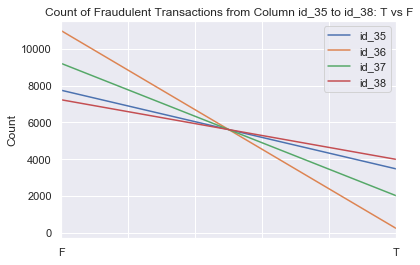

In [142]:
# to create a new dataframe with only fraudulent transactions for the 4 columns below 
fraud_identity_35 = fraud_id[['id_35', 'id_36', 'id_37', 'id_38']]

# to count and plot the number of T & F values in the 4 columns
for c in fraud_identity_35.columns:
    print("---- %s ---" % c)
    print(fraud_identity_35[c].value_counts())
    fraud_identity_35[c].value_counts().plot()
    plt.legend()
plt.ylabel('Count')
plt.title('Count of Fraudulent Transactions from Column id_35 to id_38: T vs F')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/39. Count of Fraudulent Transactions from Column id_35 to id_38: T vs F.jpeg',bbox_inches = "tight")
plt.show()

In [143]:
# count by device type
print(identity['DeviceType'].value_counts())
print(identity['DeviceType'].value_counts(normalize=True, dropna=False))

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64
desktop    0.590468
mobile     0.385799
NaN        0.023732
Name: DeviceType, dtype: float64


DeviceType  isFraud
desktop     0          79611
            1           5554
mobile      0          49988
            1           5657
dtype: int64


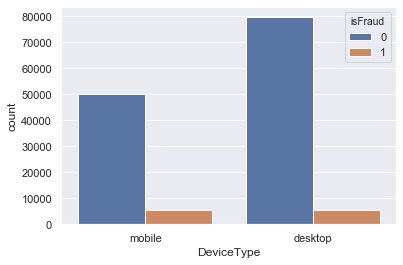

In [144]:
# to count and plot by device type and if the transaction is fraudulent
print(df.groupby(['DeviceType','isFraud']).size())

sns.countplot(x='DeviceType', hue='isFraud', data=df)
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/40. Count by Device Type: False vs True.jpeg',bbox_inches = "tight")
plt.show()

Even though there are more desktop transactions, there are more fraud transactions on the mobile platform.

mobile     5657
desktop    5554
Name: DeviceType, dtype: int64
mobile     0.504594
desktop    0.495406
Name: DeviceType, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


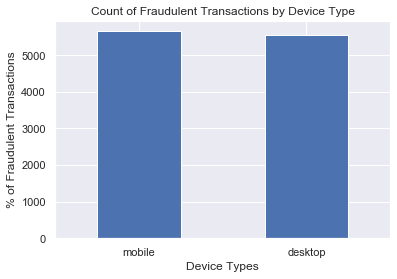

In [145]:
# Count by device type on fraudulent transactions only
print(fraud_id.DeviceType.value_counts())
print(fraud_id.DeviceType.value_counts(normalize=True))
fraud_id.DeviceType.value_counts().plot('bar')
plt.xticks(rotation=0)
plt.xlabel('Device Types')
plt.ylabel('% of Fraudulent Transactions')
plt.title('Count of Fraudulent Transactions by Device Type')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/41. % of Fraudulent Transactions by Device Type.jpeg',bbox_inches = "tight")
plt.show()

desktop    0.065215
mobile     0.101662
Name: DeviceType, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


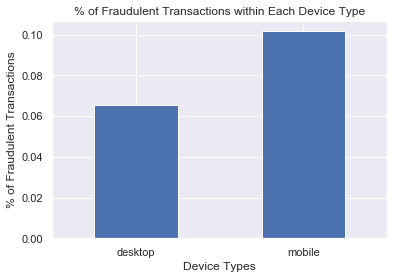

In [146]:
# Calculate the % of fraudulent transactions within each device type
DeviceType = fraud_id.DeviceType.value_counts()/df.DeviceType.value_counts()
print(DeviceType)
DeviceType.plot('bar')
plt.xticks(rotation=0)
plt.xlabel('Device Types')
plt.ylabel('% of Fraudulent Transactions')
plt.title('% of Fraudulent Transactions within Each Device Type')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/42. % of Fraudulent Transactions within Each Device Type.jpeg',bbox_inches = "tight")
plt.show()

In [147]:
# to count the number of unique values in column "DeviceInfo"
identity['DeviceInfo'].nunique()

1786

Windows        47722
iOS Device     19782
MacOS          12573
Trident/7.0     7440
rv:11.0         1901
Name: DeviceInfo, dtype: int64
Windows        0.402154
iOS Device     0.166703
MacOS          0.105953
Trident/7.0    0.062697
rv:11.0        0.016020
Name: DeviceInfo, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """


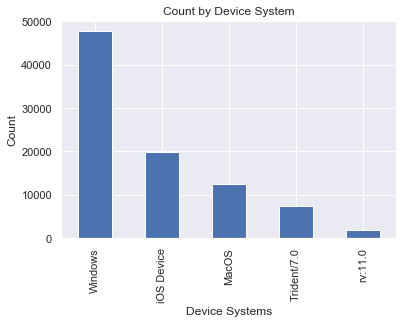

In [148]:
# to count the top 5 device systems
print(identity['DeviceInfo'].value_counts().head(5))
print(identity['DeviceInfo'].value_counts(normalize=True).head(5))

identity['DeviceInfo'].value_counts().head(5).plot('bar')
plt.xlabel('Device Systems')
plt.ylabel('Count')
plt.title('Count by Device System')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/43. Count by Device System.jpeg',bbox_inches = "tight")
plt.show()

Windows                   3121
iOS Device                1240
MacOS                      278
hi6210sft Build/MRA58K     180
SM-A300H Build/LRX22G      169
Name: DeviceInfo, dtype: int64
Windows                   0.362612
iOS Device                0.144069
MacOS                     0.032299
hi6210sft Build/MRA58K    0.020913
SM-A300H Build/LRX22G     0.019635
Name: DeviceInfo, dtype: float64


/Users/wanranli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """


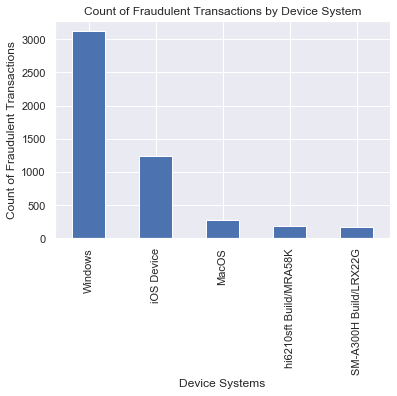

In [149]:
# Count by device info on fraudulent transactions only
print(fraud_id['DeviceInfo'].value_counts().head(5))
print(fraud_id['DeviceInfo'].value_counts(normalize=True).head(5))

fraud_id['DeviceInfo'].value_counts().head(5).plot('bar')
plt.xlabel('Device Systems')
plt.ylabel('Count of Fraudulent Transactions')
plt.title('Count of Fraudulent Transactions by Device System')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 2/pics/44. Count of Fraudulent Transactions by Device System.jpeg',bbox_inches = "tight")
plt.show()